<a href="https://colab.research.google.com/github/jeraldflowers/Classifier-Dog_Cats-keras/blob/main/first_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

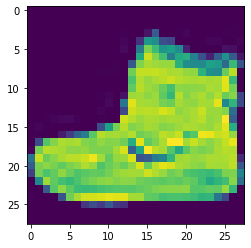

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Data Models

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compile - Train

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 16s 5ms/step - loss: 0.5657 - accuracy: 0.7941
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3954 - accuracy: 0.8602
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3560 - accuracy: 0.8727
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3366 - accuracy: 0.8792
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3268 - accuracy: 0.8835
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3225 - accuracy: 0.8853
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3197 - accuracy: 0.8872
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3153 - accuracy: 0.8900
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3161 - accuracy: 0.8903
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3177 - accuracy: 0.889

In [ ]:
model.evaluate(test_images, test_labels, verbose=0)

[0.29872190952301025, 0.9027000069618225]

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
model.fit(train_images,
          train_labels, 
          batch_size=64, 
          callbacks=[early], 
          epochs=10)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3182 - accuracy: 0.8904
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3194 - accuracy: 0.8901


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                   verbose=1,
                                   monitor='accuracy',
                                   save_best_only=True)
model.fit(train_images,
          train_labels, 
          batch_size=64, 
          callbacks=[checkpoint], 
          epochs=10)

Epoch 1/10
930/938 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.8839
Epoch 1: accuracy improved from -inf to 0.88402, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 4s 5ms/step - loss: 0.3416 - accuracy: 0.8840
Epoch 2/10
937/938 [============================>.] - ETA: 0s - loss: 0.3443 - accuracy: 0.8823
Epoch 2: accuracy did not improve from 0.88402
938/938 [==============================] - 4s 5ms/step - loss: 0.3442 - accuracy: 0.8823
Epoch 3/10
932/938 [============================>.] - ETA: 0s - loss: 0.3447 - accuracy: 0.8838
Epoch 3: accuracy did not improve from 0.88402
938/938 [==============================] - 4s 5ms/step - loss: 0.3441 - accuracy: 0.8839
Epoch 4/10
933/938 [============================>.] - ETA: 0s - loss: 0.3444 - accuracy: 0.8810
Epoch 4: accuracy did not improve from 0.88402
938/938 [==============================] - 4s 5ms/step - loss: 0.3446 - accuracy: 0.8809
Epoch 5/10
938/938 [==========

In [ ]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')


In [ ]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 0.2923 - accuracy: 0.8970


[0.2923278510570526, 0.8970000147819519]